In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath

#for 'data (data,data)' type file
def spitdata(filename,xmin=0,xmax=math.inf,option="yes"):
    with open(filename) as f:
        rawdata = f.readlines()
    x = []
    y = []
    z = []
    for i in range (1, len(rawdata)):
        xtemp = float(rawdata[i].split('\t')[0])
        ytemp = float(rawdata[i].split('\t')[1].split(',')[0][1:-2])
        ztemp = float(rawdata[i].split('\t')[1].split(',')[1][:-3])
        if(xtemp>xmin and xtemp<xmax):
            x.append(xtemp)
            y.append(ytemp)
            z.append(ztemp)
    if(option != "no"):
        for i in range (0, len(z)):
            if(z[i] > 0):
                z[i] = -360+z[i]
    return x,y,z

def spitdata_k(filename,xmin=0,xmax=math.inf):
    with open(filename) as f:
        rawdata = f.readlines()
    x = []
    y = []
    z = []
    x_temp = []
    y_temp = []
    z_temp = []
    for i in range (0, len(rawdata)):
        try:
            xtemp = float(rawdata[i].split('\t')[0])
            ytemp = float(rawdata[i].split('\t')[1].split(',')[0][1:-2])
            ztemp = float(rawdata[i].split('\t')[1].split(',')[1][:-3])
            if(xtemp>xmin and xtemp<xmax):
                x_temp.append(xtemp)
                y_temp.append(ytemp)
                z_temp.append(ztemp)
        except:
            x.append(x_temp)
            y.append(y_temp)
            z.append(z_temp)
            x_temp = []
            y_temp = []
            z_temp = []
    return x,y,z

#for 'data data' type file
def spitdata2(filename,xmin=0,xmax=math.inf):
    with open(filename) as f:
        rawdata = f.readlines()
    data = []
    x = []
    y = []
    for i in range (0, len(rawdata)):
        xtemp = float(rawdata[i].split('\t')[0])
        ytemp = float(rawdata[i].split('\t')[1])
        if(xtemp > xmin and xtemp < xmax):
            x.append(xtemp)
            y.append(ytemp)
    return x,y

In [2]:
def plot_gain_phase(filename,xlim=(0,0),linestyle_="-",trendline=[]):
    print("Graphing: " + filename)
    if(xlim == (0,0)):
        x,y,z = spitdata("source/"+filename)
    else:
        x,y,z = spitdata("source/"+filename,xlim[0],xlim[1])
    #ax2
    ax1.set_ylabel("Amplitude [dB]")
    line1, = ax1.plot(x,y,c='black',linewidth=1,linestyle=linestyle_)
    #ax1
    ax2.set_xlabel("Frequency [Hz]")
    ax2.set_ylabel("Phase [degree]")
    line2, = ax2.plot(x,z,c='black',linewidth=1,linestyle=linestyle_)
    line1.set_label(filename)
    line2.set_label(filename)
    ax1.legend()
    ax2.legend()
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    if(len(trendline) > 0):
        for j in range (0, len(trendline)):
            new_x = []
            new_y = []
            for i in range (0, len(x)):
                if(x[i] > trendline[j][0] and x[i] < trendline[j][1]):
                    new_x.append(x[i])
                    new_y.append(y[i])
            new_x = np.array(new_x)
            new_y = np.array(new_y)
            slope, intercept = np.polyfit(np.log10(new_x), new_y, 1)
            print("\tgain slope(" +str(trendline[j])+"): " + str(slope))
            
def plot_gain(filename,xlim=(0,0),linestyle_="-",trendline=[]):
    print("Graphing: " + filename)
    if(xlim == (0,0)):
        x,y,z = spitdata("source/"+filename)
    else:
        x,y,z = spitdata("source/"+filename,xlim[0],xlim[1])
    #ax2
    plt.ylabel("Amplitude [dB]")
    line1, = plt.plot(x,y,c='black',linewidth=1,linestyle=linestyle_)
    #ax1
    plt.xlabel("Frequency [Hz]")
    line1.set_label(filename)
    plt.legend()
    
def plot_gain_k(filename,xlim=(0,0),linestyle_="-",trendline=[]):
    print("Graphing: " + filename)
    if(xlim == (0,0)):
        x,y,z = spitdata_k("source/"+filename)
    else:
        x,y,z = spitdata_k("source/"+filename,xlim[0],xlim[1])
    #ax2
    ax1.set_ylabel("Amplitude [dB]")
    ax2.set_ylabel("Phase [degrees]")
    for i in range (0, len(x)):
        if(i==6):
            ax1.plot(x[i],y[i],c='blue',linewidth=1,linestyle=linestyle_)
            ax2.plot(x[i],z[i],c='blue',linewidth=1,linestyle=linestyle_)
        else:
            ax1.plot(x[i],y[i],c='black',linewidth=1,linestyle=linestyle_)
            ax2.plot(x[i],z[i],c='black',linewidth=1,linestyle=linestyle_)
    #ax1
    ax1.set_xscale("log")
    ax2.set_xscale("log")
    ax1.set_xlabel("Frequency [Hz]")
    
    
def drawline(plotname,direction,value,linestyle_="-",printbool = False):
    if(direction=="x"):
        plotname.axvline(value,ymin=0,ymax=1,c='black',linewidth=0.5,linestyle=linestyle_)
        if(printbool): print("Vertical Line at: x=" + str(value))
    else:
        plotname.axhline(value,xmin=0,xmax=1,c='black',linewidth=0.5,linestyle=linestyle_)
        if(printbool): print("Horizontal Line at: y=" + str(value))

# 反転



Graphing: 20dB_AC_ad711.txt
	gain slope([1200000, 10000000]): -19.978360154582237
Graphing: 40dB_AC_ad711.txt
	gain slope([100000, 10000000]): -19.94028516035755
Horizontal Line at: y=37
Vertical Line at: x=50000
Horizontal Line at: y=17
Vertical Line at: x=470000


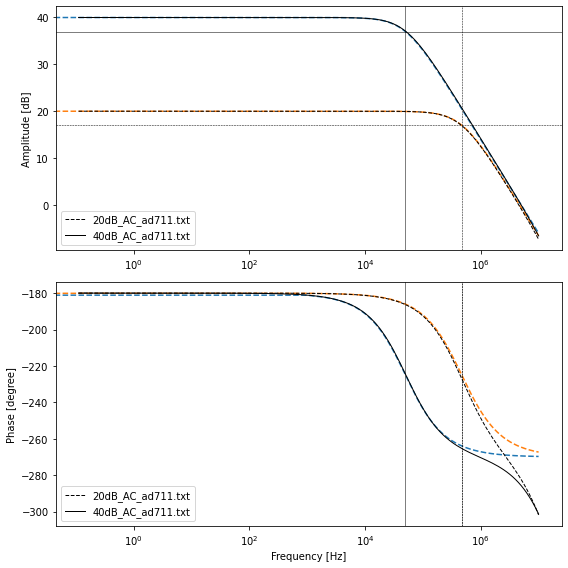

In [3]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)

print("\n")

def riron(omega):
    return A_0/(1+1j*(omega/omega_p))

#理論曲線-----------------------------
#理論曲線40dB
A_0 = 100
omega_p = 50000
x = [i*1000 for i in range (0, 10000)]
y = [20*np.log10(math.sqrt(riron(x[i]).real**2+riron(x[i]).imag**2)) for i in range (0, len(x))]
z = [np.angle(riron(x[i]))/(2*math.pi)*360-180 for i in range (0, len(x))]
ax1.plot(x,y, linestyle="dashed")
ax2.plot(x,z,linestyle="dashed")
#理論曲線20dB
A_0 = 10
omega_p = 470000
x = [i*1000 for i in range (0, 10000)]
y = [math.sqrt(riron(x[i]).real**2+riron(x[i]).imag**2) for i in range (0, len(x))]
y = [20*np.log10(math.sqrt(riron(x[i]).real**2+riron(x[i]).imag**2)) for i in range (0, len(x))]
z = [np.angle(riron(x[i]))/(2*math.pi)*360-180 for i in range (0, len(x))]
ax1.plot(x,y, linestyle="dashed")
ax2.plot(x,z,linestyle="dashed")

#実測値-----------------------------
plot_gain_phase("20dB_AC_ad711.txt",linestyle_="dashed",trendline=[[1200000,10000000]])
plot_gain_phase("40dB_AC_ad711.txt",trendline=[[100000,10000000]])

#直線関係-----------------------------
drawline(ax1,"y",37,printbool=True)
drawline(ax1,"x",50000,printbool=True)
drawline(ax1,"y",17,"dashed",printbool=True)
drawline(ax1,"x",470000,"dashed",printbool=True)

drawline(ax2,"x",50000)
drawline(ax2,"x",470000,"dashed")
drawline(ax2,"x",470000,"dashed")

plt.savefig("figures/hanten(20dB,40dB).png")

Graphing: 20dB_AC_ad711.txt
Graphing: 40dB_AC_ad711.txt
Graphing: amplifier_ad711.txt


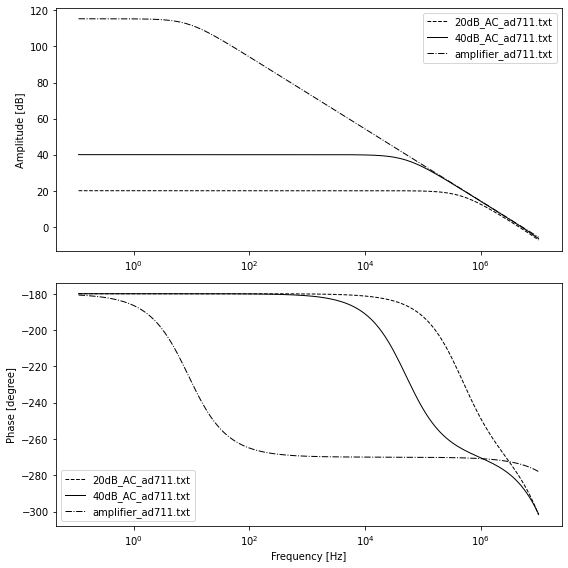

In [4]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)
plot_gain_phase("20dB_AC_ad711.txt",linestyle_="dashed")
plot_gain_phase("40dB_AC_ad711.txt")
plot_gain_phase("amplifier_ad711.txt",linestyle_="dashdot")

plt.savefig("figures/hanten(20dB,40dB,raw).png")

# 非反転

Graphing: 2-11_20dB_AC.txt
	gain slope([1000000, 10000000]): -19.968465347978476
Graphing: 2-11_40dB_AC.txt
	gain slope([100000, 10000000]): -19.953804858601483
Horizontal Line at: y=37
Vertical Line at: x=50000
Horizontal Line at: y=17
Vertical Line at: x=470000
Horizontal Line at: y=0
Vertical Line at: x=5000000


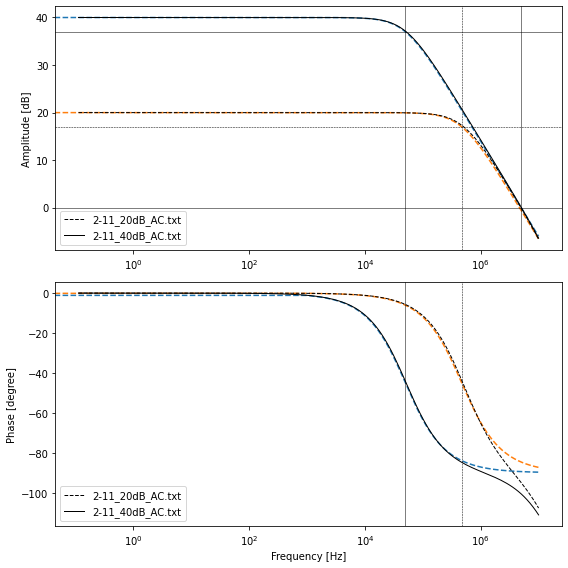

In [5]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)

#理論曲線-----------------------------
beta = 1/10
def riron(omega):
    return A_0/(1+1j*(omega/omega_p))

#理論曲線40dB
A_0 = 100
omega_p = 50000
x = [i*1000 for i in range (0, 10000)]
y = [20*np.log10(math.sqrt(riron(x[i]).real**2+riron(x[i]).imag**2)) for i in range (0, len(x))]
z = [np.angle(riron(x[i]))/(2*math.pi)*360 for i in range (0, len(x))]
ax1.plot(x,y, linestyle="dashed")
ax2.plot(x,z,linestyle="dashed")
#理論曲線20dB
A_0 = 10
omega_p = 470000
x = [i*1000 for i in range (0, 10000)]
y = [math.sqrt(riron(x[i]).real**2+riron(x[i]).imag**2) for i in range (0, len(x))]
y = [20*np.log10(math.sqrt(riron(x[i]).real**2+riron(x[i]).imag**2)) for i in range (0, len(x))]
z = [np.angle(riron(x[i]))/(2*math.pi)*360 for i in range (0, len(x))]
ax1.plot(x,y, linestyle="dashed")
ax2.plot(x,z,linestyle="dashed")

#実測値-----------------------------
plot_gain_phase("2-11_20dB_AC.txt",linestyle_="dashed",xlim=[0,10000000],trendline = [[1000000,10000000]])
plot_gain_phase("2-11_40dB_AC.txt",xlim=[0,10000000],trendline=[[100000,10000000]])


#直線-----------------------------
drawline(ax1,"y",37,printbool=True)
drawline(ax1,"x",50000,printbool=True)
drawline(ax1,"y",17,"dashed",printbool=True)
drawline(ax1,"x",470000,"dashed",printbool=True)
drawline(ax1,"y",0,printbool=True)
drawline(ax1,"x",5000000,printbool=True)
drawline(ax2,"x",50000)
drawline(ax2,"x",470000,"dashed")

plt.savefig("figures/hihanten(20dB,40dB).png")

Graphing: voutbyvin_biseki_no_cf.txt
	gain slope([0, 80]): 19.65241517915241
	gain slope([1000000, 5000000]): -19.211007718930446


Horizontal Line at: y=17
Vertical Line at: x=100
Vertical Line at: x=500000


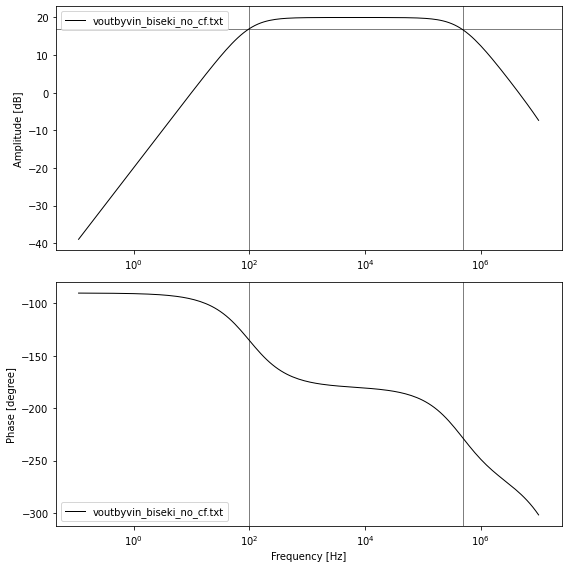

In [6]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)
plot_gain_phase("voutbyvin_biseki_no_cf.txt",trendline=[[0,80],[1000000,5000000]])

print("\n")

drawline(ax1,"y",17,printbool=True)
drawline(ax1,"x",100,printbool=True)
drawline(ax1,"x",500000,printbool=True)

drawline(ax2,"x",100)
drawline(ax2,"x",500000)

plt.savefig("figures/bibun_no_cf.png")

Graphing: voutbyvin_biseki_no_rrcf.txt


Vertical Line at: x=6800


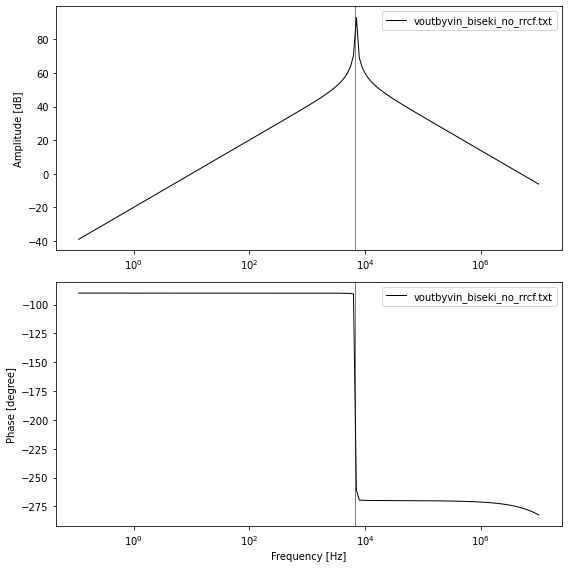

In [7]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)
plot_gain_phase("voutbyvin_biseki_no_rrcf.txt")
print("\n")
drawline(ax1,"x",6800,printbool=True)
drawline(ax2,"x",6800)

plt.savefig("figures/bibun_no_rrcf.png")

Graphing: voutbyvin_biseki_with_rrcf.txt
	gain slope([0, 80]): 19.652373846662183
	gain slope([12000, 800000]): -18.04239913082189


Horizontal Line at: y=17
Vertical Line at: x=100
Vertical Line at: x=10000


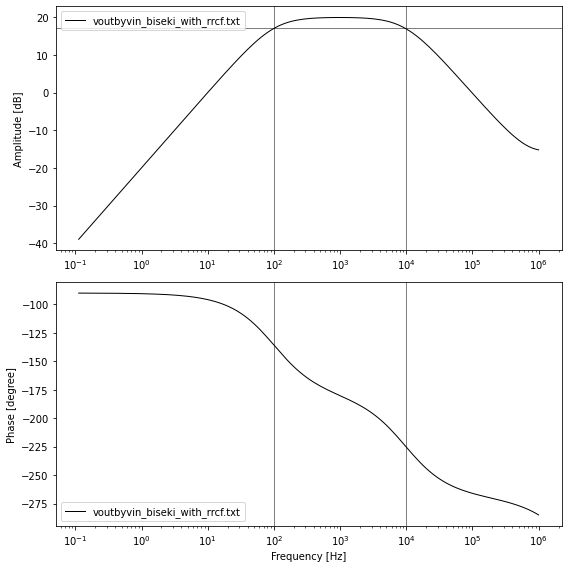

In [8]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)
plot_gain_phase("voutbyvin_biseki_with_rrcf.txt",trendline=[[0,80],[12000,800000]],xlim=[0,1000000])

print("\n")

drawline(ax1,"y",17,printbool=True)
drawline(ax1,"x",100,printbool=True)
drawline(ax1,"x",10000,printbool=True)

drawline(ax2,"x",100)
drawline(ax2,"x",10000)

plt.savefig("figures/bibun_with_rrcf.png")

In [9]:
def graph_time(filename,linestyle_="-"):
    x,y = spitdata2("source/"+filename,xmax = 1.06*10**(-3))
    line, = plt.plot(x,y,c='black',linewidth=1,linestyle=linestyle_)
    plt.ylabel("Amplitude [dB]")
    plt.xlabel("Time [s]")
    line.set_label(filename)
    plt.legend(loc="lower right")

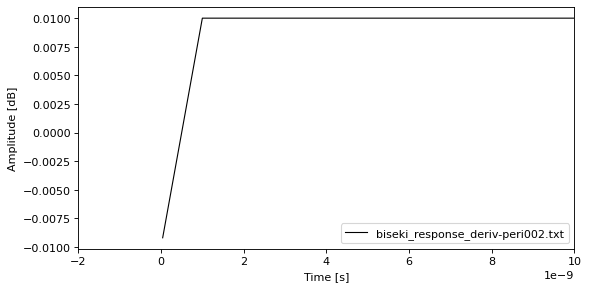

In [10]:
plt.figure(figsize=(8, 4), dpi=80)
graph_time("biseki_response_deriv-peri002.txt")
plt.xlim(-0.000000002,0.00000001)
plt.show()

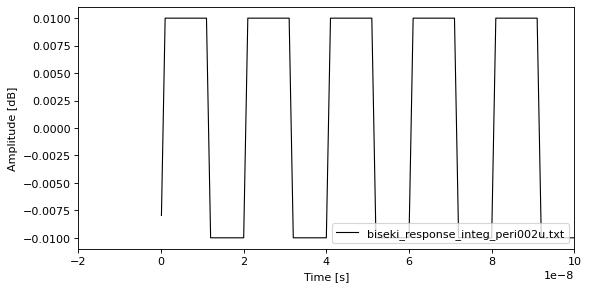

In [11]:
plt.figure(figsize=(8, 4), dpi=80)
graph_time("biseki_response_integ_peri002u.txt")
plt.xlim(-0.00000002,0.0000001)
plt.show()

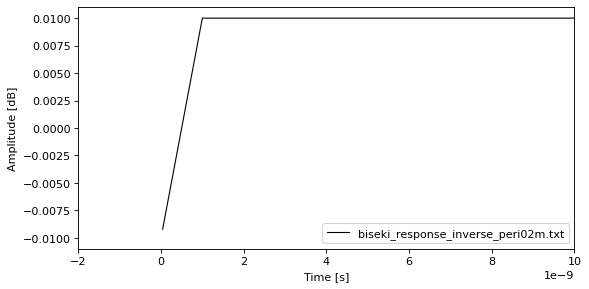

In [12]:
plt.figure(figsize=(8, 4), dpi=80)
graph_time("biseki_response_inverse_peri02m.txt")
plt.xlim(-0.000000002,0.00000001)
plt.show()

Graphing: wienbridge_oscillation_k0501.txt


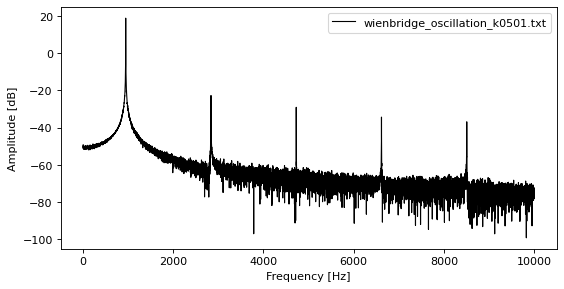

In [13]:
plt.figure(figsize=(8, 4), dpi=80)
plot_gain("wienbridge_oscillation_k0501.txt",xlim=[0,10000])


Graphing: wienbridge_oscillationafter_k08.txt
Vertical Line at: x=0
Vertical Line at: x=764
Vertical Line at: x=1528
Vertical Line at: x=2292
Vertical Line at: x=3056
Vertical Line at: x=3820
Vertical Line at: x=4584
Vertical Line at: x=5348
Vertical Line at: x=6112
Vertical Line at: x=6876
Vertical Line at: x=7640
Vertical Line at: x=8404
Vertical Line at: x=9168
Vertical Line at: x=9932


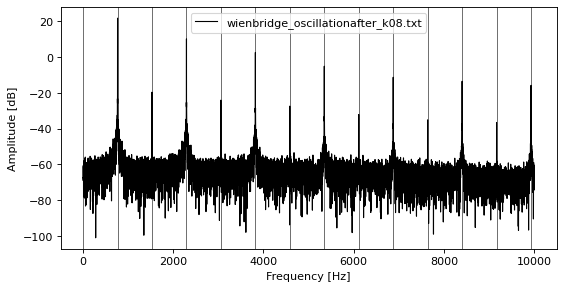

In [14]:
plt.figure(figsize=(8, 4), dpi=80)
plot_gain("wienbridge_oscillationafter_k08.txt",xlim=[0,10000])
#764
for i in range (0, 14):
    drawline(plt,"x",764*i,printbool=True)
    
k=0.8
C=16.7*10**-9
R=10000

def H(s):
    return k*s*C*R/((s*C*R)**2+3*s*C*R + 1)

Y = []
X = []
for f in range (0, 100):
    #Y.append(20*np.log10(H(1j*2*math.pi*f*100)))
    X.append(f*100)
    
#plt.plot(X,Y)

Graphing: wienbridge_oscillationbefore_k03.txt


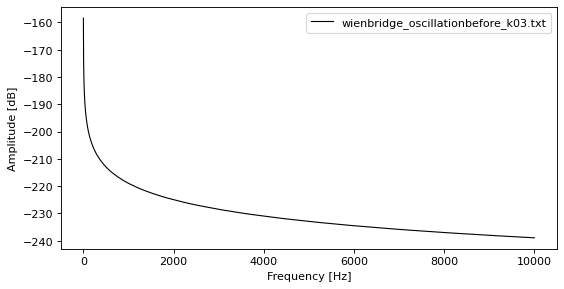

In [15]:
plt.figure(figsize=(8, 4), dpi=80)
plot_gain("wienbridge_oscillationbefore_k03.txt",xlim=[0,10000])

Graphing: openloop_spectrum.txt
Vertical Line at: x=952


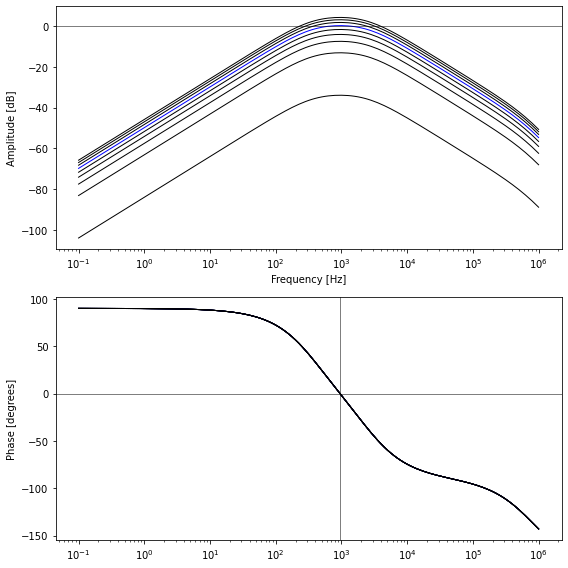

<Figure size 640x320 with 0 Axes>

In [16]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)
plt.figure(figsize=(8, 4), dpi=80)
plot_gain_k("openloop_spectrum.txt",xlim=[0,1000000])

drawline(ax1,"y",0)
drawline(ax2,"y",0)
drawline(ax2,"x",952,printbool=True)

math.sqrt(-2)

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '576x576', '-pix_fmt', 'rgba', '-r', '33.333333333333336', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'anim.mp4']' returned non-zero exit status 255.

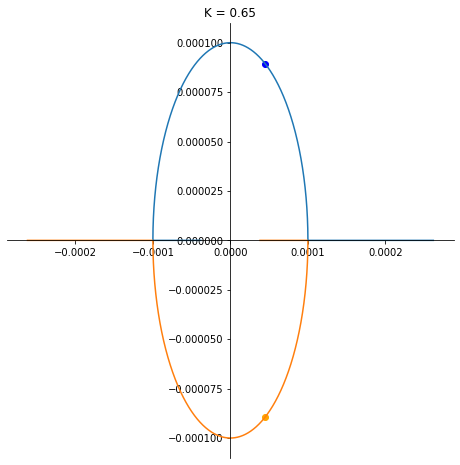

In [17]:
import matplotlib.animation as animation

C = 16.7**(10**-9) 
R = 10000
k = [i/1000 for i in range (10, 1000)]
A = 6
x = []
y = []
x_ = []
y_ = []

fig = plt.figure(figsize=(8,8))
for i in range (0, 100000):
    k = i/100000
    a = C**2 * R**2
    b = (3-k*A)*C*R
    c = 1
    s = (-b + pow((b**2-4*a*c),0.5)) / (2*a)
    s_ = (-b - pow((b**2-4*a*c),0.5)) / (2*a)
    x.append(s.real)
    y.append(s.imag)
    x_.append(s_.real)
    y_.append(s_.imag)
plt.plot(x,y)
plt.plot(x_,y_)

#k=0.5
ims = []
ims_ = []
point = 0
point = plt.scatter(s.real,s.imag,c='blue')
def plotthis(i):
    plt.cla()
    plt.plot(x,y)
    plt.plot(x_,y_)
    k = i/100
    a = C**2 * R**2
    b = (3-k*A)*C*R
    c = 1
    s = (-b + pow((b**2-4*a*c),0.5)) / (2*a)
    s_ = (-b - pow((b**2-4*a*c),0.5)) / (2*a)
    plt.scatter(s.real,s.imag,c='blue')
    plt.scatter(s_.real,s_.imag,c='orange')
    plt.gca().spines['left'].set(position='zero')
    plt.gca().spines['bottom'].set(position='center')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.title("K = "+'{:.2f}'.format(i/100))

i = [i/100 for i in range (0,100)]

ani = animation.FuncAnimation(fig, plotthis, interval = 30,frames = 100)
ani.save('anim.mp4', writer="ffmpeg")

Graphing: 20dboscillo.txt


ValueError: could not convert string to float: ''

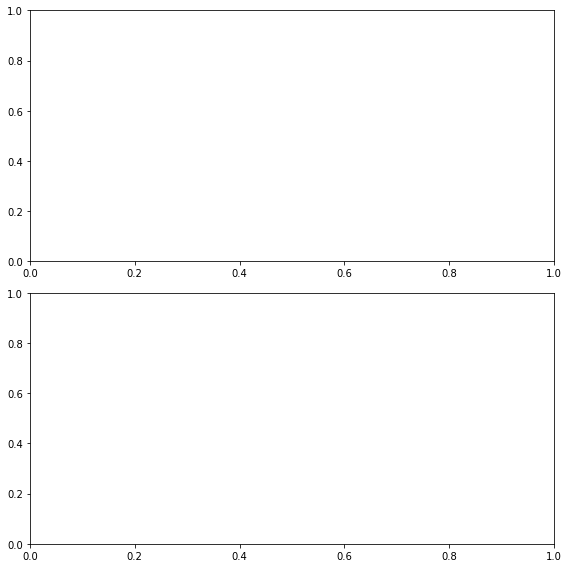

<Figure size 640x320 with 0 Axes>

In [18]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)
plt.figure(figsize=(8, 4), dpi=80)
plot_gain_phase("20dboscillo.txt",xlim=[0,1000000])